# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
data_folder = '../traffic-signs-data'

training_file = data_folder + '/' + 'train.p'
validation_file=data_folder + '/' + 'valid.p'
testing_file = data_folder + '/' + 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(np.hstack((y_train,y_valid,y_test))))
                                   
print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

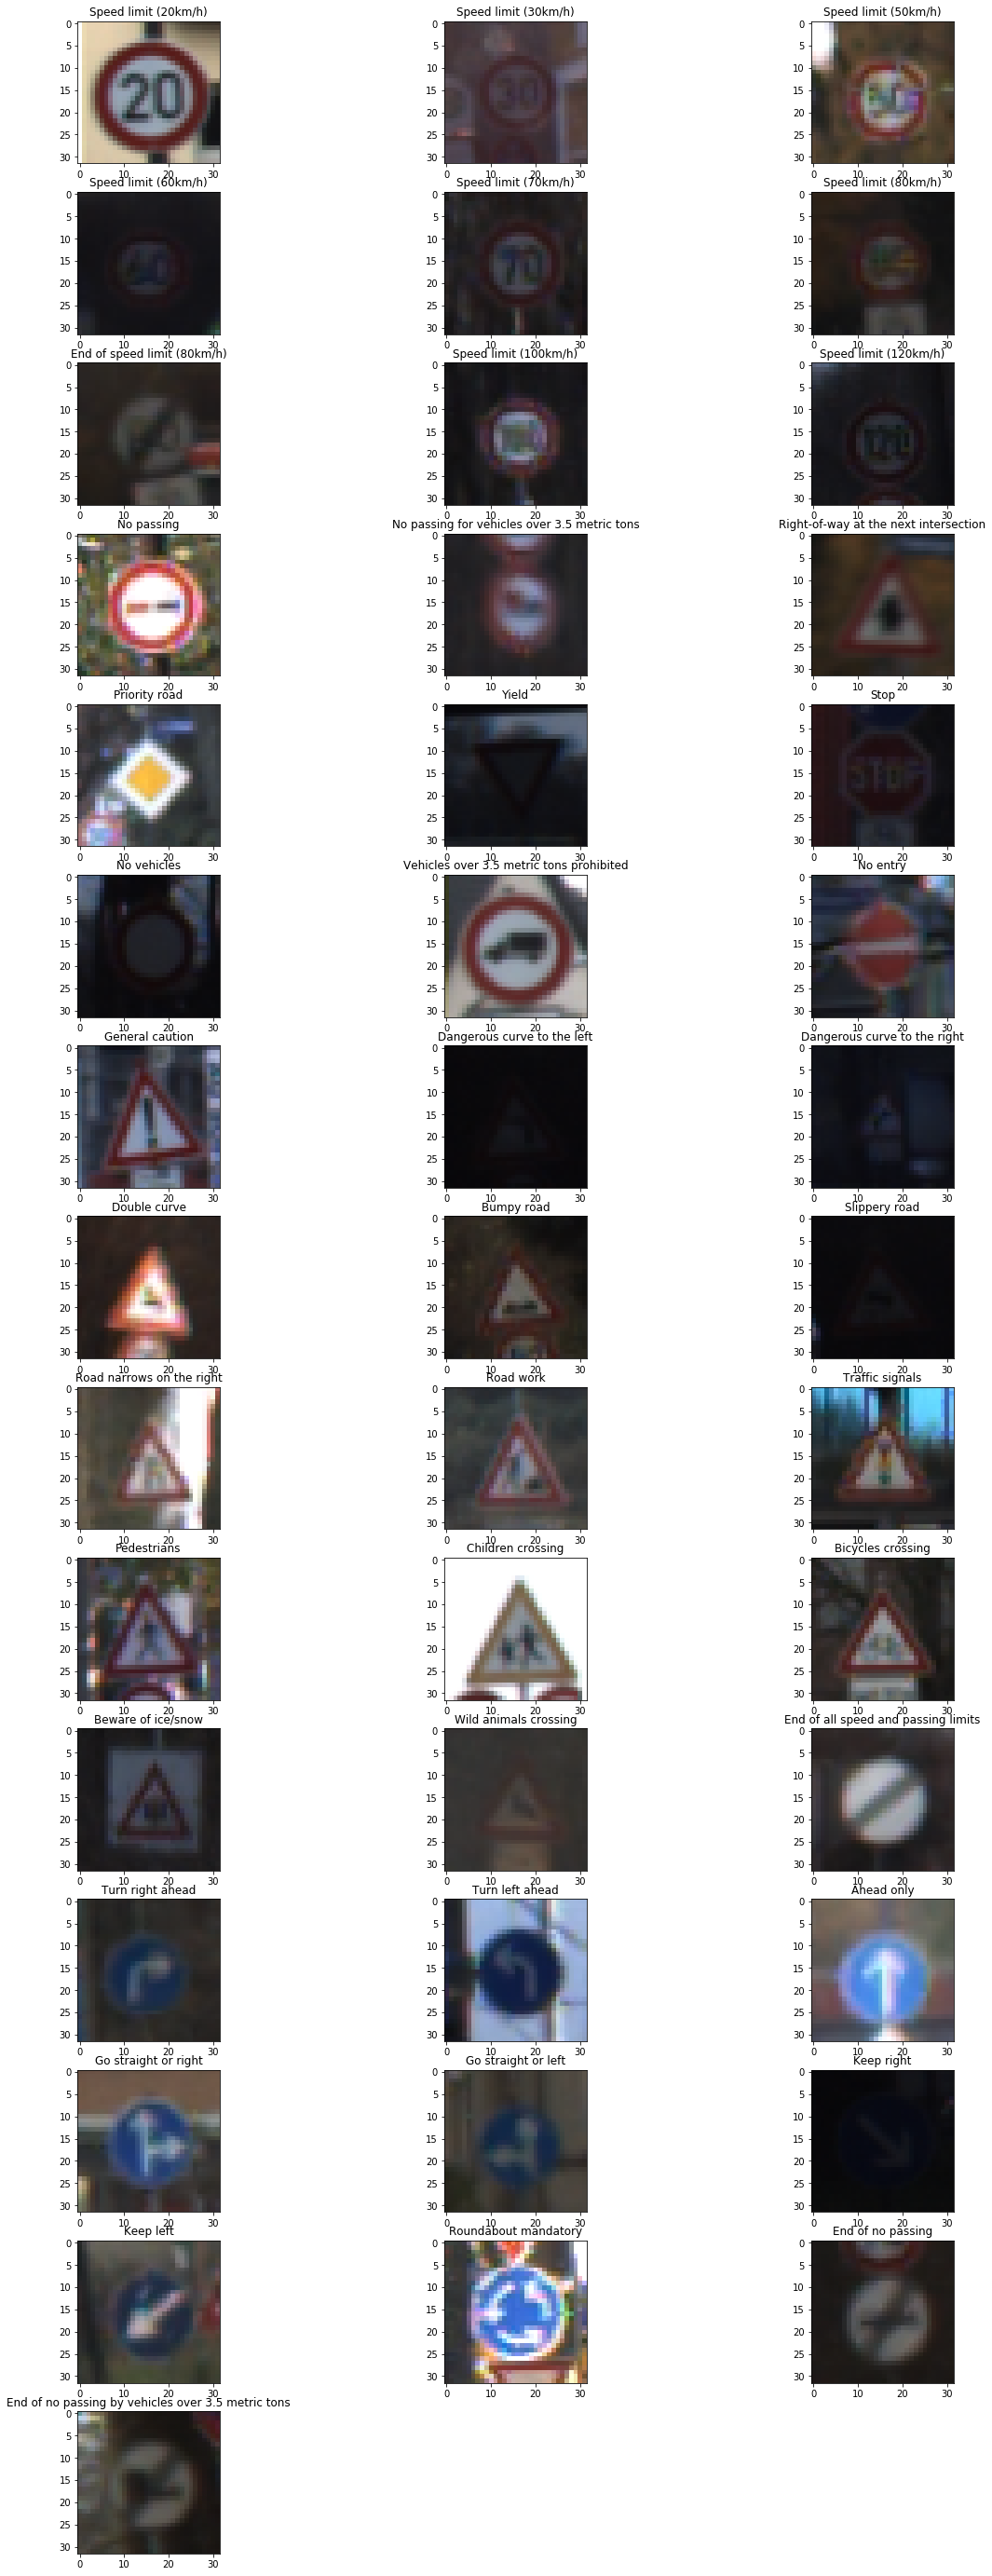

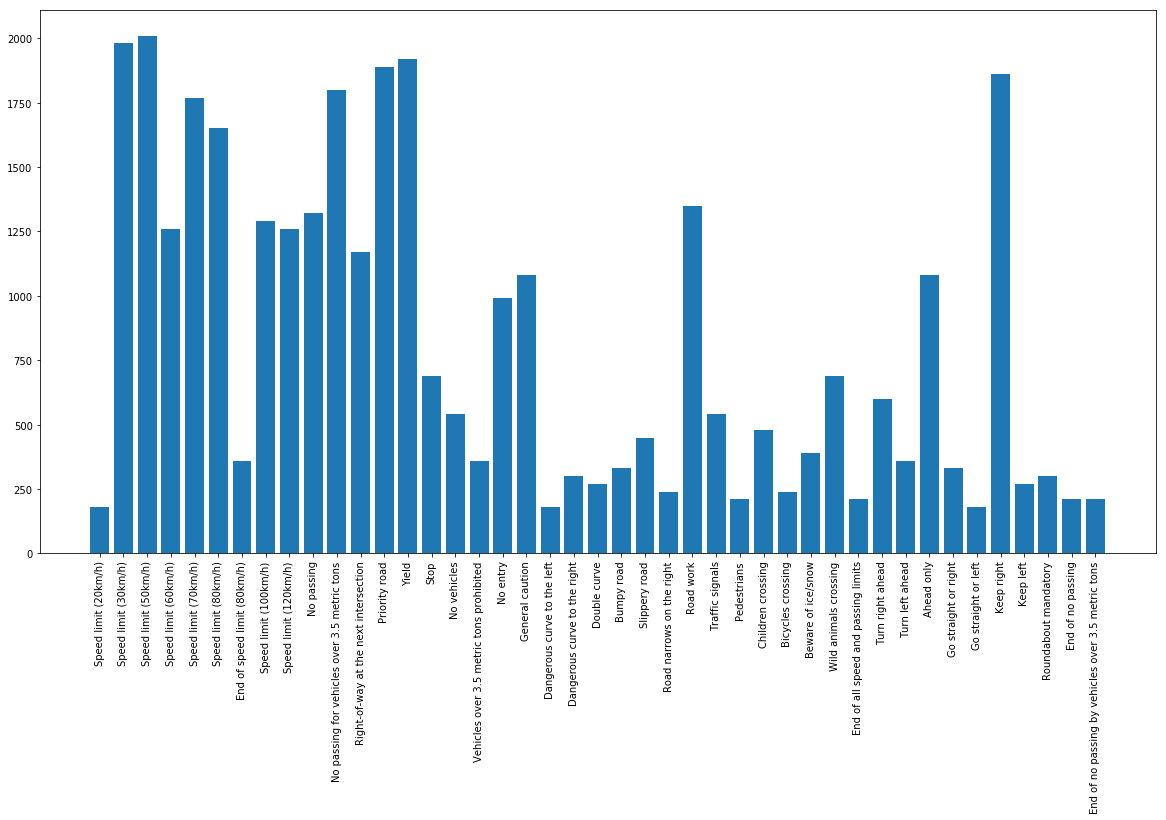

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
import pandas as pd

# get labels
label_names = pd.read_csv("signnames.csv") 
label_dict  = dict(label_names.values.tolist())

# Visualizations will be shown in the notebook.
%matplotlib inline
(classes_train, classes_train_firstInd ,n_classes_train) = np.unique(y_train, return_index=True, return_counts=True)
(classes_all_set) = np.unique(np.hstack((y_train,y_valid,y_test)))

# initialize classes for all detected ones
classes_all = range(np.min(classes_all_set),np.max(classes_all_set)+1)
classes_name_all = ['Unknown' for i in range(len(classes_all))]

# match data
n_classes_train_all = np.zeros_like(classes_all)
for i,class_train in enumerate(classes_train):
    n_classes_train_all[class_train] = n_classes_train[i]
    classes_name_all[class_train]    = label_dict[class_train]

# plot first occurence for each label
plots_per_row = 3;
fig, subplt = plt.subplots(np.int_(np.ceil(len(classes_train)/plots_per_row)),plots_per_row,figsize=(20,50))


for cnt in range(len(classes_train)):
    subplt[cnt//plots_per_row][np.mod(cnt,plots_per_row)].imshow(X_train[classes_train_firstInd[cnt]])
    subplt[cnt//plots_per_row][np.mod(cnt,plots_per_row)].set_title(classes_name_all[classes_train[cnt]])
    
for cnt in range(len(classes_train),subplt.shape[0]*subplt.shape[1]):
    subplt[cnt//plots_per_row][np.mod(cnt,plots_per_row)].set_visible(False) 
    
plt.savefig('output_folder/' + 'image_classes.jpg')
plt.show()

# plot data statistics
plt.figure(figsize=(20,10))
plt.bar(classes_all,n_classes_train_all)
plt.xticks(classes_all, classes_name_all,rotation=90)
plt.savefig('output_folder/' + 'histogram_unequal.jpg')
plt.show()




**NOTE**
The Dataset shows a heavily varying distribution depending on the label. Therefore, the next main task is to balance the number of observations for each label, which is explained in the next section.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

In this part the dataset is preprocessed. For the input training data the data is additionally extended so that every label has the same amount of data. This is done by adding modified images of the original data. So this in case the maximum required datapoint amount for each label is 1.5 of the amount of the label with the maximum number of datapoints. Assuming label 2 has just half of it. So we are extending its data by augmenting the existing ones. E.g. augmentation here is scaling, translation, rotation, noise and brightness modifications. These augmentations are randomly combined in order to provide the neural network with a wide range of examples.
After balancing the dataset every image is transformed to YUV and then its YUV are normalized from 0:255 to -1:1. This is performed after the image augmentations, as the operations neccessary for that augmentation appear to be easier in standard image format.

YUV is selected as in the Paper given afore, written by Yann Lecun et. al. As the Y channel basically gives a gray channel and UV the color it is used later to train for separate feature in the neural network.

Adding 3840 augmented images of class 00 to the training dataset!
Adding 2040 augmented images of class 01 to the training dataset!
Adding 2010 augmented images of class 02 to the training dataset!
Adding 2760 augmented images of class 03 to the training dataset!
Adding 2250 augmented images of class 04 to the training dataset!
Adding 2370 augmented images of class 05 to the training dataset!
Adding 3660 augmented images of class 06 to the training dataset!
Adding 2730 augmented images of class 07 to the training dataset!
Adding 2760 augmented images of class 08 to the training dataset!
Adding 2700 augmented images of class 09 to the training dataset!
Adding 2220 augmented images of class 10 to the training dataset!
Adding 2850 augmented images of class 11 to the training dataset!
Adding 2130 augmented images of class 12 to the training dataset!
Adding 2100 augmented images of class 13 to the training dataset!
Adding 3330 augmented images of class 14 to the training dataset!
Adding 348

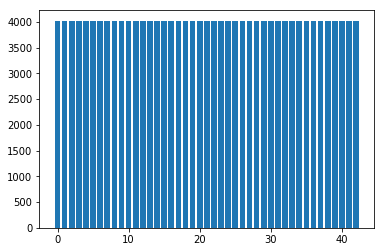

Dataset preprocessed!
Dataset preprocessed!
Dataset preprocessed!

Preprocessing done!



In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
# Import tensorflow first
import tensorflow as tf
import cv2
from sklearn.utils import shuffle
import random

# used from the tensorflow lesson
# however the color of the image is sutained here in order to exploit the color properties of traffic signs
def normalize(image_data,color_min,color_max):
    """
    Normalize the image data with Min-Max scaling to a range of [-1, 1]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    return -1.0 + ( ( (image_data - color_min)*2.0 )/( color_max - color_min ) )

def rotZoom(image_data,angle,crop):
    image_center = tuple(np.array(image_data.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    crop_val = \
    int(np.minimum(0.5*image_data.shape[0]*(np.cos(np.absolute(angle*np.pi/180))),\
                   0.5*image_data.shape[1]*np.sin(np.absolute(angle*np.pi/180))))
    crop_val = np.maximum(1,crop_val)
    image_out = np.zeros_like(image_data)
    
    result = cv2.warpAffine(image_data, rot_mat, image_out.shape[1::-1], cv2.INTER_AREA)
    if crop > 0:
        result = result[crop_val:(image_out.shape[0]-crop_val),crop_val:(image_out.shape[1]-crop_val),:]
        image_out = cv2.resize(result,image_out.shape[1::-1], interpolation = cv2.INTER_AREA) 
    else:
        image_out = result
    
    return image_out


def shiftZoom(image_data,x_offs,y_offs,resize):
    crop_val =  int(np.maximum(np.absolute(x_offs),np.absolute(y_offs)))
    crop_val = np.maximum(1,crop_val)
    image_out = np.zeros_like(image_data)
    
    if x_offs >= 0:
        range_x = range(x_offs,np.minimum(image_data.shape[0],image_data.shape[0] - crop_val+x_offs))
        range_x1 = range(0,len(range_x))
    else:
        range_x = range(np.maximum(0,crop_val+x_offs),(image_data.shape[0]+x_offs))
        range_x1 = range((image_data.shape[0]-len(range_x)),image_data.shape[0])
            
    if y_offs >= 0:
        range_y = range(y_offs,np.minimum(image_data.shape[1],image_data.shape[1] - crop_val+y_offs))
        range_y1 = range(0,len(range_y))
    else:
        range_y = range(np.maximum(0,crop_val+y_offs),(image_data.shape[1]+y_offs))
        range_y1 = range((image_data.shape[1]-len(range_y)),image_data.shape[1])
    
    result = image_data  
    if resize > 0:
        result = result[range_x,:,:]  
        result = result[:,range_y,:]   
        image_out = cv2.resize(result,image_out.shape[1::-1],interpolation = cv2.INTER_AREA) 
    else:
        image_out[range_x1,:,:] = result[range_x,:,:]  
        image_out[:,range_y1,:] = image_out[:,range_y,:]
        
        
    return image_out

def applyZoom(image_data,zoom):
    image_out = np.zeros_like(image_data)
    new_size = (np.int_(image_out.shape[1]*zoom),np.int_(image_out.shape[0]*zoom))
    result = cv2.resize(image_data,new_size,interpolation = cv2.INTER_AREA) 
    if zoom > 1:
        off = int(np.floor(new_size[0] - image_out.shape[1]))
        result2 = result[off:(new_size[0]-off),off:(new_size[0]-off),:]
    else:
        off = int(np.floor(new_size[0] - image_out.shape[1]))
        result2 = np.zeros_like(image_data)
        result2[-off:(-off + new_size[0]),-off:(-off + new_size[0]),:] = result
    
    image_out =  cv2.resize(result2,image_out.shape[1::-1],interpolation = cv2.INTER_AREA) 
    
    
    return image_out

def flipImage(image_data):
    image_out = np.zeros_like(image_data)
    
    range_x = range(image_data.shape[0]-1,-1,-1)
    
    result = image_data
    image_out = result[range_x,:,:]  
        
    return image_out

# appyl gaussian noise to image
# got from https://theailearner.com/2019/05/07/add-different-noise-to-an-image/
def applyNoise(image_data,gain):
    gauss = np.random.uniform(-1,1,image_data.shape)
    
    image_out = np.zeros_like(image_data)
    
    image_out = np.maximum(0.0,np.minimum(255.0,image_data+ 255*gauss*0.01 * gain)).astype(np.uint8)
        
    return image_out

def varyLight(image_data,gain):    
    image_out = np.zeros_like(image_data)
    temp_image = cv2.cvtColor(image_data, cv2.COLOR_RGB2HLS)
    temp_image[:,:,1] = np.maximum(0.0,np.minimum(255.0,np.array(temp_image[:,:,1]).astype(np.float64)*gain)).astype(np.uint8)
    image_out = cv2.cvtColor(temp_image, cv2.COLOR_HLS2RGB)        
        
    return image_out

# equalize count of samples
def balance_dataset(data_in, label_in):
    (classes, n_classes) = np.unique(label_in, return_counts=True)
    data_out = np.copy(data_in)
    label_out = np.copy(label_in)
    for class_ in range(len(n_classes)):        
        
        nb_missing_labels =  int(np.max(n_classes)*2.0) - n_classes[class_] # min. double the numbers
        if nb_missing_labels > 0:
            print("Adding {:04d} augmented images of class {:02d} to the training dataset!".format(nb_missing_labels,classes[class_]))
        else:
            continue
    
        out_data = np.copy(data_in[classes[class_] == label_in]
                             [np.random.randint(0, n_classes[class_] - 1,nb_missing_labels)])
        
        for ind in range(nb_missing_labels):     
            out_data[ind] = rotZoom(out_data[ind],random.uniform(-12.0,12.0),random.randint(0,0))  
            out_data[ind] = applyNoise(out_data[ind],random.uniform(-3.0,3.0))  
            out_data[ind] = shiftZoom(out_data[ind],random.randint(-4,4),random.randint(-4,4),random.randint(0,0)) 
            out_data[ind] = applyZoom(out_data[ind],random.uniform(0.8,1.2)) 
            out_data[ind] = varyLight(out_data[ind],random.uniform(0.25,1.5))   
                                                
            #out_data[ind] = np.reshape(rand_image,(1,out_data.shape[1],out_data.shape[2],out_data.shape[3]))
        
        data_out = np.vstack((data_out, out_data))
        label_out = np.hstack((label_out, np.ones(nb_missing_labels)*classes[class_]))
    
    (classes, n_classes) = np.unique(label_out, return_counts=True)
    print()
    print("Constant distribution of elements along all classes established")
    plt.bar(classes,n_classes)
    plt.savefig('output_folder/' + 'histogram_unequal.jpg')
    plt.show()
            
    return data_out, label_out

# combine preprocession
def preprocess(data_in, label_in,balance_data):
    data_out = np.copy(data_in)
    label_out = np.copy(label_in)
       
    if balance_data is True:
        data_out, label_out = balance_dataset(data_out, label_out)
        
    for i in range(data_out.shape[0]):
        # conversion yuv
        data_out[i,:,:,:] = cv2.cvtColor(data_out[i],cv2.COLOR_RGB2YUV)
        # normalize y channel
        y_max = float(np.max(data_out[i,:,:,0]))
        y_min = float(np.min(data_out[i,:,:,0]))
        data_out[i,:,:,0] = np.maximum(0,(np.float64(data_out[i,:,:,0])-y_min)/(y_max - y_min)*255.0)
        
    
    #data_out = data_out[:,:,:,:1]
    
    # Normalize Data
    data_out = normalize(data_out,0.0,255.0)   
               
    # turn labels into floats
    label_out = label_out.astype(np.float32)
    
    print("Dataset preprocessed!")
    
    return data_out, label_out


X_train_prep_full,y_train_prep_full = preprocess(X_train,y_train,True) # used for training
X_train_prep,y_train_prep = preprocess(X_train,y_train,False) # used for validation
X_valid_prep,y_valid_prep = preprocess(X_valid,y_valid,False) # used for validation too

print()
print("Preprocessing done!")
print()



#### Example plots for image modifications 
Here you can see some of the modifications made to enlarge and balance the input dataset. However, the transformation to the normalized image in YUV colorspace is conducted after these augmentations, as explained before.
After these augmentations each image-channel is mapped from the range (0:255) to the range (-1:1)

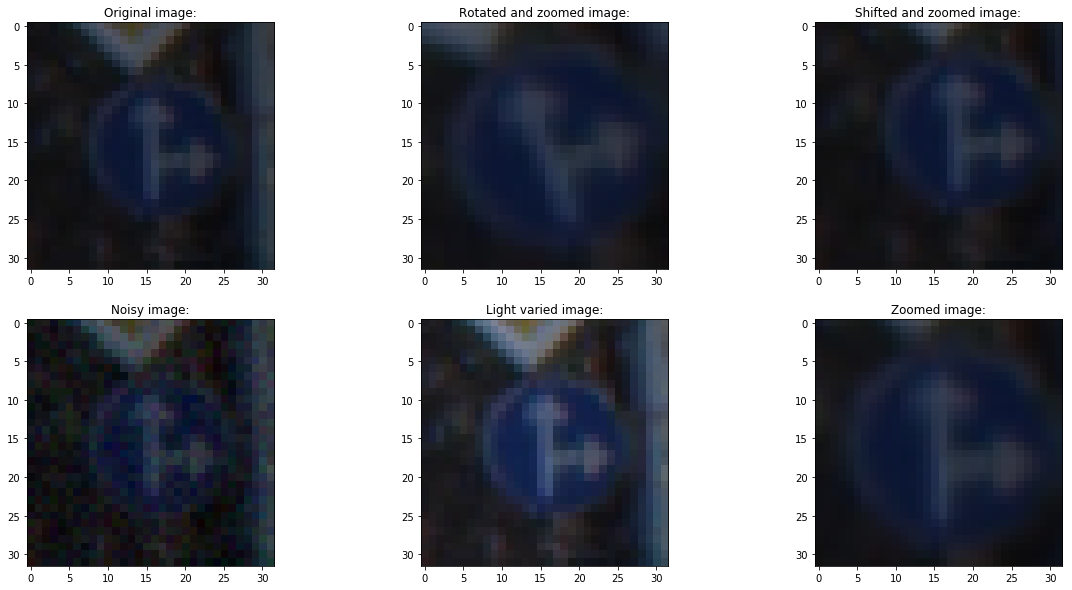

y channel normalization


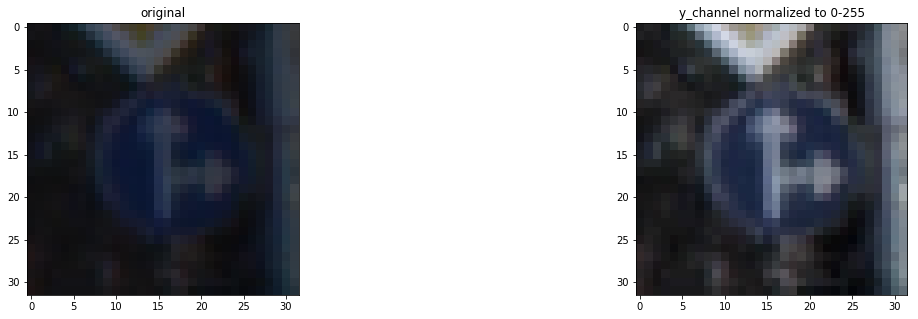

In [7]:
fig, sb = plt.subplots(2,3,figsize=(20,10))
sb[0][0].imshow(X_train[1000])
sb[0][0].set_title("Original image:")
sb[0][1].imshow(rotZoom(X_train[1000],20,1))
sb[0][1].set_title("Rotated and zoomed image:")
sb[0][2].imshow(shiftZoom(X_train[1000],4,-4,1))
sb[0][2].set_title("Shifted and zoomed image:")
sb[1][0].imshow(applyNoise(X_train[1000],4))
sb[1][0].set_title("Noisy image:")
sb[1][1].imshow(varyLight(X_train[1000],1.5))
sb[1][1].set_title("Light varied image:")
sb[1][2].imshow(applyZoom(X_train[1000],1.2))
sb[1][2].set_title("Zoomed image:")
plt.savefig('output_folder/' + 'image_augmented.jpg')
plt.show()

print('y channel normalization')
fig, sb = plt.subplots(1,2,figsize=(20,5))
sb[0].imshow(X_train[1000])
sb[0].set_title('original')
# normalize y channel
y_max = float(np.max(X_train[1000]))
y_min = float(np.min(X_train[1000]))
yuv_img = cv2.cvtColor(np.copy(X_train[1000]),cv2.COLOR_RGB2YUV)
yuv_img[:,:,0] = np.maximum(0,(np.float64(yuv_img[:,:,0])-y_min)/(y_max - y_min)*255.0)
sb[1].set_title('y_channel normalized to 0-255')
sb[1].imshow(cv2.cvtColor(yuv_img,cv2.COLOR_YUV2RGB))                             
plt.show()

### Model Architecture

As given in (http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) a simplified variant of the given architectures is used

My final model consisted of the following layers:

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x3 YUV image   						
| 
| Convolution 1 5x5     	| 1x1 stride, same padding, outputs 28x28x30 for Y Channel (Input: 32x32x1) and 28x28x8 for the UV Channel (Input: 32x32x2) 	|
|   70% Dropout 1         |                                                 |
| RELU 1				|												|
| Max pooling 1     	| 2x2 stride,  outputs 14x14x38 				|
| Convolution 2 5x5	    | Output 10x10x64      									|
|   70% Dropout 2         |                                                 |
| Max pooling 2	      	| 2x2 stride, Input from Convolution 2, outputs 5x5x64 				| 
| Fully connected 1	| Input: 1600; Output: 200        									|
| Fully connected 2	| Input: 200; Output: 43        									|
| Softmax				| End of Graph        									|
 
 For instance due to the limited data set, the number of convolutions are set to a mimimum. However, a similar combination gave valid results in the mentioned paper. Additionally a dropout in the second layer is introduced to improve robustness. For the sake of computational performance, the parallel feedtrough of the first layer into the fully-connected hidden layer is ommit as it would introduce plenty of additional parameter in the output layer.

In [21]:
## get my data back
#load all libs again
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
import pandas as pd
import tensorflow as tf
import cv2
from sklearn.utils import shuffle
import random
from tensorflow.contrib.layers import flatten

# read from pickle
#with open('preprocessed_data.p', 'rb') as f:  # Python 3: open(..., 'wb')
#    X_train_prep_full,y_train_prep_full, X_train_prep,y_train_prep,X_valid_prep,y_valid_prep = pickle.load(f)
    

In [25]:
### Define your architecture here.
### Feel free to use as many code cells as needed.



def LeNet_mod(x,keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1 
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x38.
    conv1_W_bright = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 30), mean = mu, stddev = sigma), name='conv1_W_bright')
    conv1_W_col = tf.Variable(tf.truncated_normal(shape=(5, 5, 2, 8), mean = mu, stddev = sigma), name='conv1_W_col')
    conv1_b = tf.Variable(tf.zeros(38), name='conv1_b')

    # combine gray and color
    conv1 = conv1_b +  tf.concat([   \
    tf.nn.conv2d(x[:,:,:,:1], conv1_W_bright, strides=[1, 1, 1, 1], padding='VALID') \
    ,tf.nn.conv2d(x[:,:,:,1:], conv1_W_col, strides=[1, 1, 1, 1], padding='VALID') \
    ],3)
    conv1 = tf.nn.dropout(conv1, keep_prob)
    
    # SOLUTION: Activation
    conv1 = tf.nn.relu(conv1)
    
    # SOLUTION: Pooling. Input = 28x28x38. Output = 14x14x38.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID',name='conv1')
    
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x64
    conv2a_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 38, 64), mean = mu, stddev = sigma), name='conv2a_W')
    conv2a_b = tf.Variable(tf.zeros(64), name='conv2a_W')
    conv2a   = tf.nn.conv2d(conv1, conv2a_W, strides=[1, 1, 1, 1], padding='VALID') + conv2a_b
    conv2a = tf.nn.dropout(conv2a, keep_prob)
    
    # SOLUTION: Activation.
    conv2a = tf.nn.relu(conv2a,name='conv2a')
    
    # SOLUTION: Pooling. Input = 10x10x64. Output = 5x5x64.
    conv2a = tf.nn.max_pool(conv2a, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID',name='conv2a')
    
    # SOLUTION: Flatten. Input = 5x5x64. Output = 1600.
    fc0   = tf.concat([flatten(conv2a)],axis=1)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 1600. Output = 200.
    fc1_W    = tf.Variable(tf.truncated_normal(shape=(1600, 200), mean = mu, stddev = sigma), name='fc1_W')
    fc1_b    = tf.Variable(tf.zeros(200), name='fc1_b')
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Layer 3: Fully Connected. Input = 1600. Output = 43.
    fc2_W    = tf.Variable(tf.truncated_normal(shape=(200, 43), mean = mu, stddev = sigma), name='fc2_W')
    fc2_b    = tf.Variable(tf.zeros(43), name='fc2_b')
    logits   = tf.matmul(fc1, fc2_W) + fc2_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### Preparation
In the preparation step helper functions and variables are defined. The difference to the approach shown in lenet-lab is the added regularization of the weights in the lost function.

In [26]:
## properties
BATCH_SIZE = 512

## init variables
x = tf.placeholder(tf.float32, (None, 32, 32,3),name='x')
y = tf.placeholder(tf.int32, (None),name='y')
one_hot_y = tf.one_hot(y, 43,name='one_hot_y')
keep_prob = tf.placeholder(tf.float32,name='keep_prob')

## setting up pipeline
rate = 0.001

logits = LeNet_mod(x,keep_prob)
var_nn = tf.trainable_variables() 
lossL2 = tf.add_n([ tf.nn.l2_loss(var)* 0.01 for var in var_nn
                    if '_b' not in var.name ],name='lossL2') 

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits,name='cross_entropy')
loss_operation = tf.reduce_mean(tf.add(cross_entropy,(lossL2/len(var_nn))),name='loss_operation')
optimizer = tf.train.AdamOptimizer(learning_rate = rate,name='optimizer')
training_operation = optimizer.minimize(loss_operation,name='training_operation')

## eval model
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1),name='correct_prediction')
eval_net = tf.nn.log_softmax(logits, 1)
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32),name='accuracy_operation')
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

def evaluate_loss(X_data, y_data):
    num_examples = len(X_data)
    total_loss = 0
    nb_batches = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_loss += loss
        nb_batches += 1
    return total_loss/nb_batches

#### Training

Training...

EPOCH: 1; Training Accuracy (Aug): 0.800; Training Accuracy: 0.935; Validation Accuracy: 0.827; Loss: 1.249
Improved! Model was saved!

EPOCH: 2; Training Accuracy (Aug): 0.900; Training Accuracy: 0.972; Validation Accuracy: 0.886; Loss: 0.803
Improved! Model was saved!

EPOCH: 3; Training Accuracy (Aug): 0.935; Training Accuracy: 0.985; Validation Accuracy: 0.911; Loss: 0.629
Improved! Model was saved!

EPOCH: 4; Training Accuracy (Aug): 0.952; Training Accuracy: 0.992; Validation Accuracy: 0.926; Loss: 0.523
Improved! Model was saved!

EPOCH: 5; Training Accuracy (Aug): 0.962; Training Accuracy: 0.992; Validation Accuracy: 0.926; Loss: 0.459
Improved! Model was saved!

EPOCH: 6; Training Accuracy (Aug): 0.971; Training Accuracy: 0.994; Validation Accuracy: 0.936; Loss: 0.399
Improved! Model was saved!

EPOCH: 7; Training Accuracy (Aug): 0.974; Training Accuracy: 0.994; Validation Accuracy: 0.934; Loss: 0.367
Improved! Model was saved!

EPOCH: 8; Training Accuracy (Aug): 

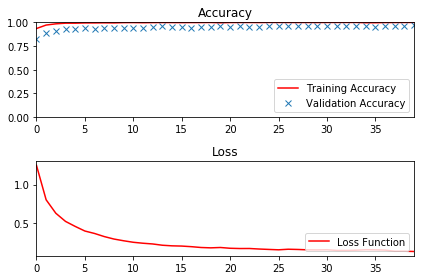

In [27]:
from sklearn.utils import shuffle

# for logging only
target_acc = 0.995
log_batch_step = 100
ep = []
train_acc_ep = []
valid_acc_ep = []
loss_ep = []

EPOCHS = 250

last_acc = 0

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    num_examples = len(X_train_prep_full)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_prep_full, y_train_prep_full = shuffle(X_train_prep_full, y_train_prep_full)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_prep_full[offset:end], y_train_prep_full[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.7})
            
        training_accuracy_full = evaluate(X_train_prep_full, y_train_prep_full)
        training_accuracy = evaluate(X_train_prep, y_train_prep)
        validation_accuracy = evaluate(X_valid_prep, y_valid_prep)
        loss  = evaluate_loss(X_train_prep_full, y_train_prep_full)
        ep.append(i)
        train_acc_ep.append(training_accuracy)
        valid_acc_ep.append(validation_accuracy)
        loss_ep.append(loss)
        print("EPOCH: {}; Training Accuracy (Aug): {:.3f}; ".format(i+1,training_accuracy_full) +
              "Training Accuracy: {:.3f}; Validation Accuracy: {:.3f}; ".format(training_accuracy,validation_accuracy) +
              "Loss: {:.3f}".format(loss))
        
        if training_accuracy_full > last_acc:
            saver.save(sess, './net_' + str(i))
            last_acc = training_accuracy_full
            print("Improved! Model was saved!")
            print()
        if (training_accuracy_full > target_acc):
            print()
            print("Required accuracy reached -> terminating the learning process")
            print()
            break
            
            
    
    
fig,acc_plot = plt.subplots(2,1)
acc_plot[0].set_title('Accuracy')
acc_plot[0].plot(ep, train_acc_ep, 'r', label='Training Accuracy')
acc_plot[0].plot(ep, valid_acc_ep, 'x', label='Validation Accuracy')
acc_plot[0].set_ylim([0, 1.0])
acc_plot[0].set_xlim([ep[0], ep[-1]])
acc_plot[0].legend(loc=4)
acc_plot[1].set_title('Loss')
acc_plot[1].plot(ep, loss_ep, 'r', label='Loss Function')
acc_plot[1].set_xlim([ep[0], ep[-1]])
acc_plot[1].legend(loc=4)
plt.tight_layout()
plt.show()


#### Refine with validation data
After I achieved the required training performance, I added an additional refinement step to utilize the already available validation data. It is worth mentioning, that the original training data is fitted very well, in contrast to the augmented data. This leads to the observation that it covered some ne testcases. Additionally the validation-dataset also did not perform (obviously) as well as the training dataset. That's why as a final step I also gone use the validation dataset to improve the net for a last time. After I finished improving the net, this data can surely be used to improve the net for real world cases.

INFO:tensorflow:Restoring parameters from ./net_39
Training...

EPOCH: 1; Training Accuracy (Aug+Val): 0.991; Loss: 0.146
EPOCH: 2; Training Accuracy (Aug+Val): 0.991; Loss: 0.145
EPOCH: 3; Training Accuracy (Aug+Val): 0.995; Loss: 0.134
EPOCH: 4; Training Accuracy (Aug+Val): 0.992; Loss: 0.140
EPOCH: 5; Training Accuracy (Aug+Val): 0.993; Loss: 0.136
EPOCH: 6; Training Accuracy (Aug+Val): 0.994; Loss: 0.134
EPOCH: 7; Training Accuracy (Aug+Val): 0.995; Loss: 0.131
EPOCH: 8; Training Accuracy (Aug+Val): 0.993; Loss: 0.134
EPOCH: 9; Training Accuracy (Aug+Val): 0.995; Loss: 0.134
EPOCH: 10; Training Accuracy (Aug+Val): 0.993; Loss: 0.133


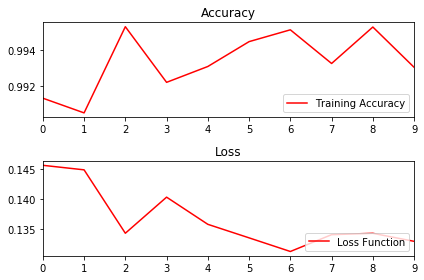

In [28]:
# for logging only
ep = []
train_acc_ep = []
loss_ep = []

EPOCHS = 10 # train again with validation set included

last_acc = 0

X_all_prep = np.concatenate([X_train_prep_full,X_valid_prep],axis=0)
Y_all_prep = np.concatenate([y_train_prep_full,y_valid_prep],axis=0)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    num_examples = len(X_all_prep)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_all_prep, Y_all_prep = shuffle(X_all_prep, Y_all_prep)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_all_prep[offset:end], Y_all_prep[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.7})
            
        training_accuracy_full = evaluate(X_all_prep, Y_all_prep)
        loss  = evaluate_loss(X_all_prep, Y_all_prep)
        ep.append(i)
        train_acc_ep.append(training_accuracy_full)
        loss_ep.append(loss)
        print("EPOCH: {}; Training Accuracy (Aug+Val): {:.3f}; ".format(i+1,training_accuracy_full) +   
        "Loss: {:.3f}".format(loss))
         
        saver.save(sess, './net_final')
        
# done
fig,acc_plot = plt.subplots(2,1)
acc_plot[0].set_title('Accuracy')
acc_plot[0].plot(ep, train_acc_ep, 'r', label='Training Accuracy')
acc_plot[0].set_xlim([ep[0], ep[-1]])
acc_plot[0].legend(loc=4)
acc_plot[1].set_title('Loss')
acc_plot[1].plot(ep, loss_ep, 'r', label='Loss Function')
acc_plot[1].set_xlim([ep[0], ep[-1]])
acc_plot[1].legend(loc=4)
plt.tight_layout()
plt.show()

**NOTE** The re-training made a huge improvement form epoch 2 to 3. Most likely there are some cases in the validation set, which were not covered by the initial training set nor the augmented training set.

#### Testing
After I finished training the net, I applied it to the test-set in order to get an idea how it would perform on unknown real-world-data. 

In [29]:
# prepare test_data
X_test_prep,y_test_prep = preprocess(X_test,y_test,False)
    

# get test dataset accuracy
with tf.Session() as sess:    
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test_prep, y_test_prep)
    print("Test-Set Accuracy = {:.3f}".format(test_accuracy))
    print()

Dataset preprocessed!
INFO:tensorflow:Restoring parameters from ./net_final
Test-Set Accuracy = 0.963



---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images
The selected images are meant to be challenging. Two of the six images are identical, as it containts two traffic signs in one. This is, as i wanted to see, if the algorithm detects either one of them of fails completely. The some of the other images are view from a different perspective, which was not covered as augmentation in the enlargment procedure of the dataset.

Image loaded:
Expected Category: Yield


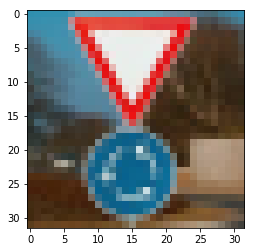



Image loaded:
Expected Category: Speed limit (50km/h)


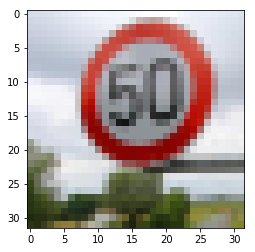



Image loaded:
Expected Category: Road work


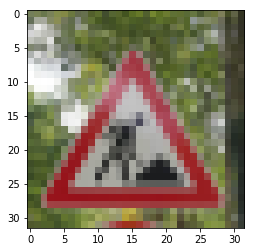



Image loaded:
Expected Category: Priority road


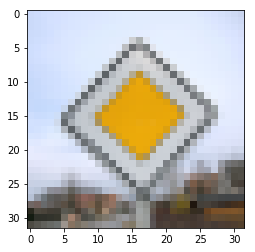



Image loaded:
Expected Category: End of speed limit (80km/h)


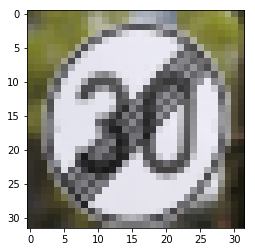



Image loaded:
Expected Category: Roundabout mandatory


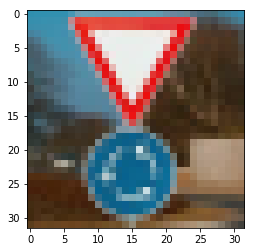

In [30]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
# props
input_path  = "images_usr"

# types
sign_image = []
expected_sign_type = []
predicted_sign_type = []

# get labels
label_names = pd.read_csv("signnames.csv") 
label_dict  = dict(label_names.values.tolist())

# get all files
files = os.listdir(input_path)

for file in files:
    if file[-3:] == 'jpg': ## check if its a jpg
        
        # store image
        img = mpimg.imread(input_path + '/' + file)
        img_resize = cv2.resize(img,image_shape[1::-1],interpolation = cv2.INTER_AREA) 
        sign_image.append(img_resize)
        
        # split filename
        expected_signs_str = str(file[:-4]).split('_')[0].split('-')
        expected_signs = []
        for i in range(len(expected_signs_str)):
            if all(map(str.isdigit, expected_signs_str[i])) is True:
                expected_signs.append(int(expected_signs_str[i]))
        
        if len(expected_signs) > 0:
            expected_sign_type.append(expected_signs)
            print("Image loaded:")
            for i in range(len(expected_signs)):
                print("Expected Category: {}".format(label_dict[expected_signs[i]]))
        else:
            expected_sign_type.append(-1)
            
        plt.imshow(img_resize)
        plt.show()
        
        print()
        print()

# generate np_arrays
sign_image = np.array(sign_image)
expected_sign_type = np.array(expected_sign_type)

### Predict the Sign Type for Each Image

In [31]:
# get new dataset accuracy

X_usr_prep,y_usr_prep = preprocess(sign_image,expected_sign_type[:,0],False)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    net_out = sess.run(eval_net, feed_dict={x: X_usr_prep, y: y_usr_prep, keep_prob: 1})
    predicted_sign_type = sess.run(tf.argmax(tf.constant(net_out),1))
    print()
    print("Result:")
    for ii in range(len(predicted_sign_type)):
        print("Expected '{}:{}'; Received: {}:{}".format(expected_sign_type[ii,0],label_dict[expected_sign_type[ii,0]],predicted_sign_type[ii],label_dict[predicted_sign_type[ii]]))
    print()

Dataset preprocessed!
INFO:tensorflow:Restoring parameters from ./net_final

Result:
Expected '13:Yield'; Received: 25:Road work
Expected '2:Speed limit (50km/h)'; Received: 3:Speed limit (60km/h)
Expected '25:Road work'; Received: 25:Road work
Expected '12:Priority road'; Received: 12:Priority road
Expected '6:End of speed limit (80km/h)'; Received: 6:End of speed limit (80km/h)
Expected '40:Roundabout mandatory'; Received: 25:Road work



### Analyze Performance
Especially the image with two traffic signs failes as expected. Surprisingly also the (50km/h) speed limit sign failed also, probably because of the untrained perspective to it. But to be fair, 50km/h is just close to 60km/h. However, the easy and mainly directly visible signs lead to good results.

In [32]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_usr_prep, y_usr_prep)
    print()
    print("Accuracy of the user-provided pictures is: {}%.".format(test_accuracy*100))

INFO:tensorflow:Restoring parameters from ./net_final

Accuracy of the user-provided pictures is: 50.0%.


### Output Top 5 Softmax Probabilities For Each Image Found on the Web
The returned probabilities pretty distinct for the correct detected images.
For the miss-predicted 50km/h sign the net returned at least a low probability, that it could be a 50km/h sign. However, it detected that it actually is a speed limit sign.
For the two-signs-in-one-image case the net did not find the correct answer, but the yield-sign was estimated with the second best probability and the roundabout-sign with the 4th best probability. As this case was not trained before. I was pretty satisfied with the results.

INFO:tensorflow:Restoring parameters from ./net_final


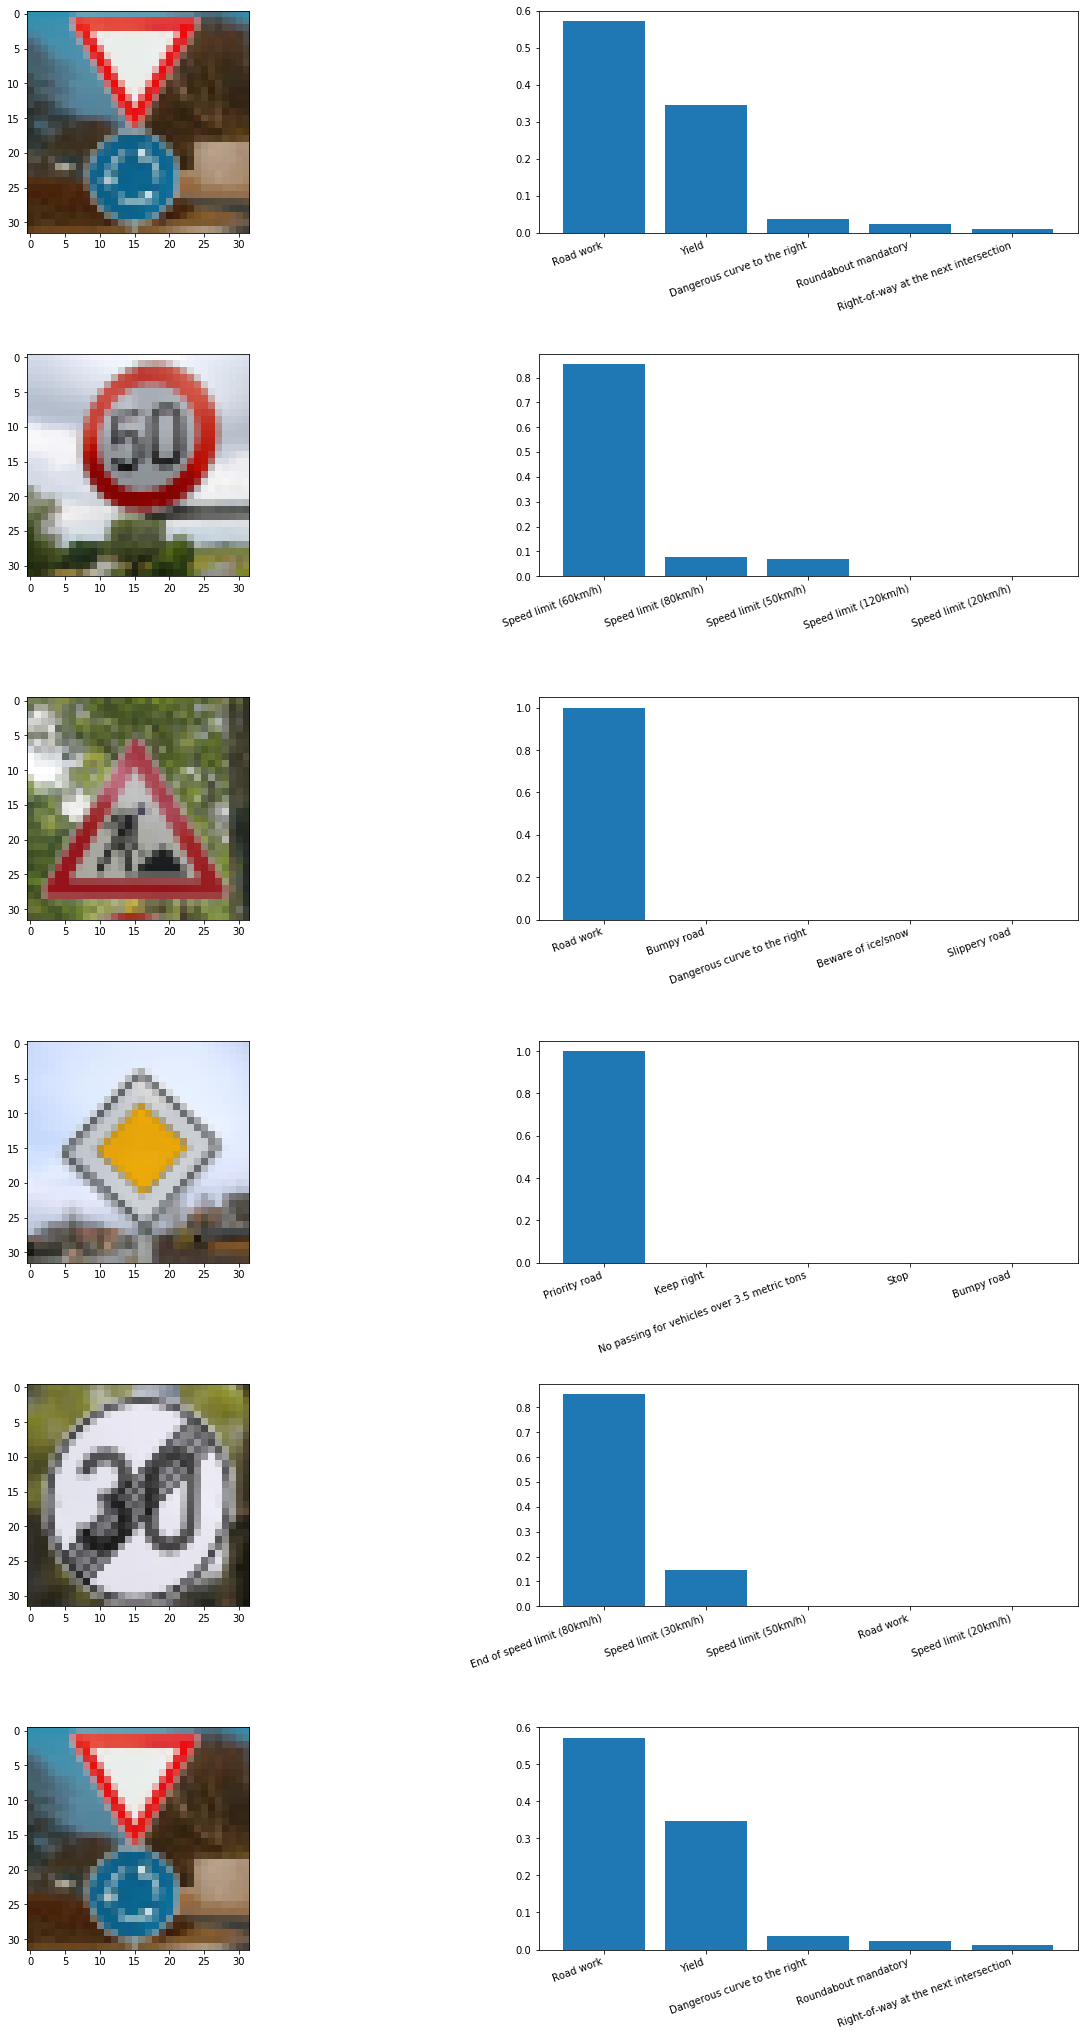

In [33]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    values,ind = sess.run(tf.nn.top_k(tf.nn.softmax(tf.constant(net_out)), k=5))

    fig,ar = plt.subplots(ind.shape[0],2,figsize=(20,30))
    plt.tight_layout(pad=10.0)
    for i in range(ind.shape[0]):
        ar[i,1].bar(range(ind.shape[1]),values[i,:])
        list_names=['']
        for j in range(ind.shape[1]):
            list_names.append(label_dict[ind[i,j]])
        ar[i,1].set_xticklabels(list_names, fontdict=None, minor=False,rotation=20, ha='right')
        ar[i,0].imshow(sign_image[i])
    
    plt.show()